In [1]:
import os
import time as tm
import numpy as np
import pandas as pd
from scHPL import train, predict, evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from load_dataset import load_dataset
from mlp_generalized import run_mlp
from cnn_generalized import run_cnn
from onehotencode import onehotencode
from split_dataset import split_dataset
from results import result

In [2]:
data_path = '~/Documents/study/Masters DSS/Thesis/Data/Interdataset-PMBC/Data_FACS.csv'
label_path = '~/Documents/study/Masters DSS/Thesis/Data/Interdataset-PMBC/Labels_FACS.csv'

X, Y = load_dataset(data_path, label_path)
print("shape of data: ", X.shape)
print("shape of labels:", Y.shape)

shape of data:  (2000, 16000)
shape of labels: (16000, 1)


In [3]:
X = X.T
print("shape of data now:", X.shape)
Y = Y['x']
print("shape of labels now:", Y.shape)

shape of data now: (16000, 2000)
shape of labels now: (16000,)


In [4]:
# one hot encode labels
ohe, y_dummy = onehotencode(Y)
print(y_dummy.shape)
# split the data into train, validation and test set
x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test = split_dataset(X, y_dummy)

(16000, 8)
shape of train set:  (12800, 2000)  and labels:  (12800, 8) 

shape of test set:  (3200, 2000)  and labels:  (3200, 8) 

Shape of train and validation set to check for overfitting
shape of train set:  (11520, 2000)  and labels:  (11520, 8) 

shape of validation set:  (1280, 2000)  and labels:  (1280, 8)


## Linear SVM performance

shape of labels in training set:  (12800,)
shape of labels in test set:  (3200,)


/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training time: 2.6166608333587646
Predict time: 0.05284404754638672
Accuracy of test set:  0.9228125
F1-score of test set:  0.9226796138685384
Precision of test set: 0.9228712530377264
Recall of test set: 0.9228125
Classification report of test set:
                                      precision    recall  f1-score   support

                      B cell - FACS       0.97      0.99      0.98       400
              CD14+ Monocyte - FACS       0.97      0.98      0.98       400
                  CD34+ cell - FACS       0.99      0.95      0.97       400
             CD4+/CD25 T Reg - FACS       0.81      0.80      0.81       400
  CD4+/CD45RA+/CD25- Naive T - FACS       0.84      0.82      0.83       400
         CD4+/CD45RO+ Memory - FACS       0.87      0.91      0.89       400
CD8+/CD45RA+ Naive Cytotoxic - FACS       0.97      0.94      0.95       400
                     NK cell - FACS       0.96      0.98      0.97       400

                           accuracy                   

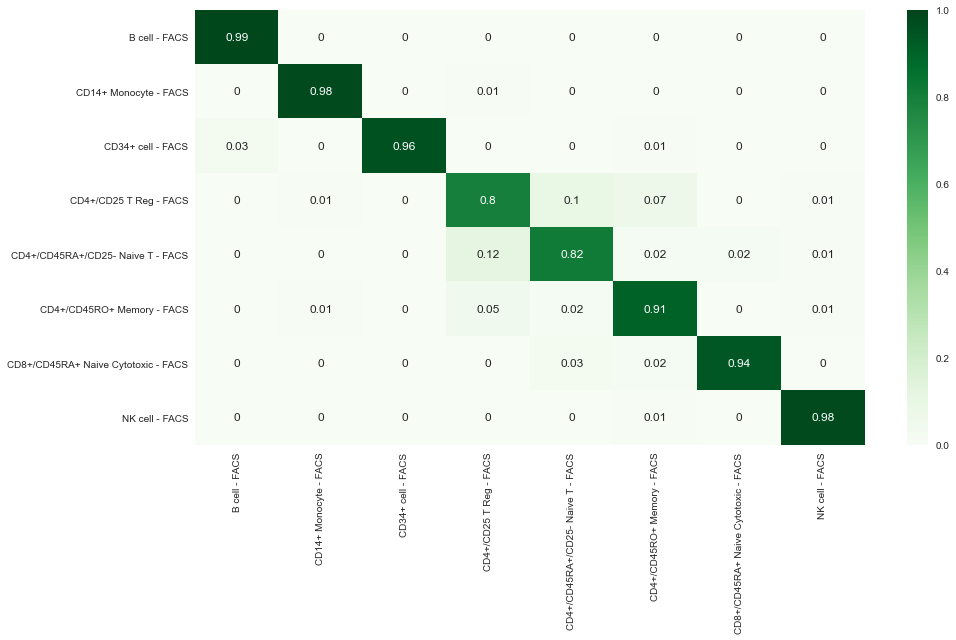

In [5]:
inv_train = ohe.inverse_transform(y_train).ravel()
inv_test = ohe.inverse_transform(y_test).ravel()
print("shape of labels in training set: ", inv_train.shape)
print("shape of labels in test set: ", inv_test.shape)

start = tm.time()
lin_svm = train.svm.LinearSVC()
lin_svm.fit(x_train, inv_train)
training_time = tm.time()-start
print('Training time:', training_time)

start = tm.time()
y_pred = lin_svm.predict(x_test)
test_time = tm.time()-start
print('Predict time:', test_time)

result(inv_test, y_pred)

## MLP performance

Train the model to check for overfitting


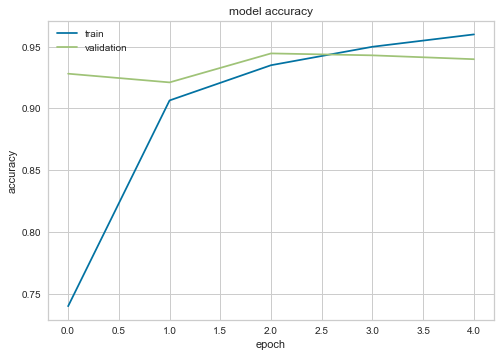

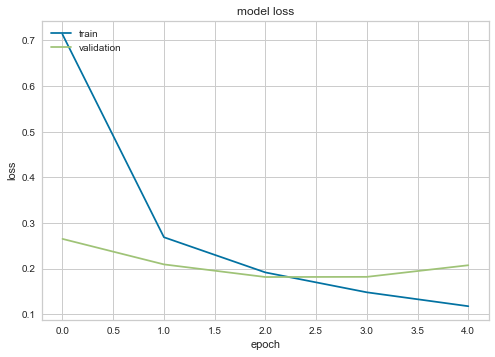

train the final model
Epoch 1/5
400/400 [==============================] - 7s 15ms/step - loss: 0.1025 - accuracy: 0.9673
Epoch 2/5
400/400 [==============================] - 5s 14ms/step - loss: 0.0882 - accuracy: 0.9701
Epoch 3/5
400/400 [==============================] - 5s 13ms/step - loss: 0.0711 - accuracy: 0.9748
Epoch 4/5
400/400 [==============================] - 5s 12ms/step - loss: 0.0572 - accuracy: 0.9816
Epoch 5/5
400/400 [==============================] - 5s 12ms/step - loss: 0.0467 - accuracy: 0.9842
Training time: 28.264747142791748
Predict time: 0.6066718101501465
The results are as follows:
Accuracy of test set:  0.9415625
F1-score of test set:  0.9416332164122374
Precision of test set: 0.9422505542523651
Recall of test set: 0.9415625
Classification report of test set:
                                      precision    recall  f1-score   support

                      B cell - FACS       0.96      0.99      0.98       400
              CD14+ Monocyte - FACS       0.9

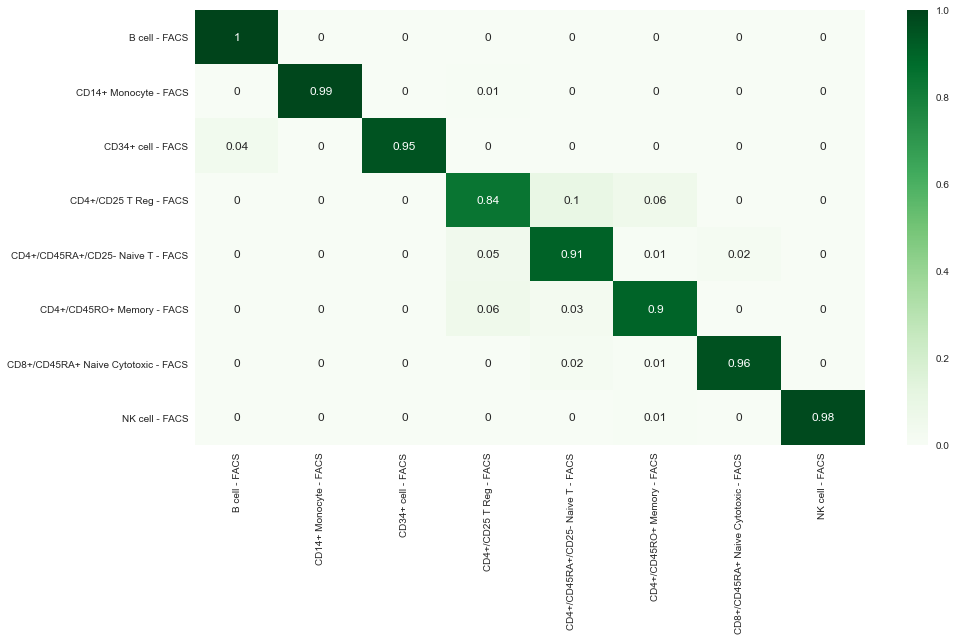

In [5]:
run_mlp(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)

## 1D-CNN performance

Train the model to check for overfitting


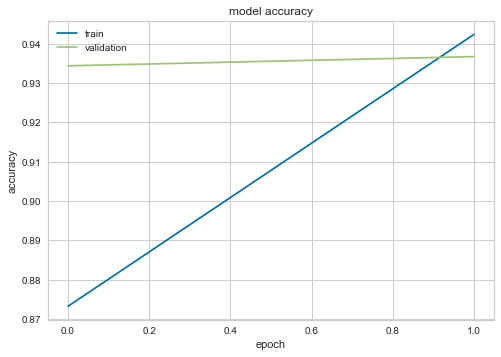

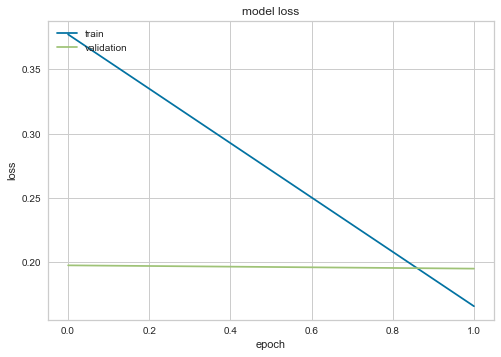

train the final model
Epoch 1/2
400/400 [==============================] - 66s 163ms/step - loss: 0.1202 - accuracy: 0.9596
Epoch 2/2
400/400 [==============================] - 72s 180ms/step - loss: 0.0905 - accuracy: 0.9681
Training time: 138.35954570770264
Predict time: 3.302724838256836
The results are as follows:
Accuracy of test set:  0.928125
F1-score of test set:  0.9294318445163635
Precision of test set: 0.9353184103016743
Recall of test set: 0.928125
Classification report of test set:
                                      precision    recall  f1-score   support

                      B cell - FACS       0.96      1.00      0.98       400
              CD14+ Monocyte - FACS       0.98      0.99      0.98       400
                  CD34+ cell - FACS       1.00      0.94      0.97       400
             CD4+/CD25 T Reg - FACS       0.73      0.92      0.81       400
  CD4+/CD45RA+/CD25- Naive T - FACS       0.90      0.81      0.86       400
         CD4+/CD45RO+ Memory - FACS 

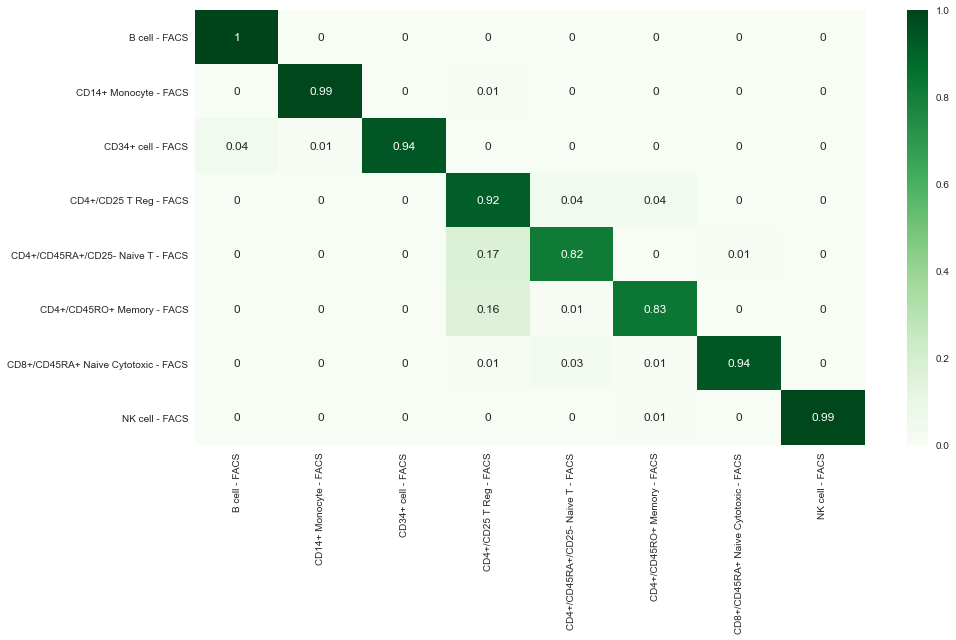

In [6]:
x_tr = np.expand_dims(x_tr,axis=-1)
x_val = np.expand_dims(x_val,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
x_train = np.expand_dims(x_train,axis=-1)
run_cnn(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)